In [1]:
import os

import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch

In [2]:
df = pd.read_csv("all_failures_database.csv")
model_grouped = df.groupby(["board", "family", "config", "hardening", ]).sum()
# model_grouped["SDC"] = (model_grouped["SDC"] - model_grouped["critical_SDC"]).abs()
model_grouped["#faults"] = 1750
model_grouped["PVF Tolerable SDC"] = model_grouped["SDC"] / model_grouped["#faults"]
model_grouped["PVF Critical SDC"] = model_grouped["critical_SDC"] / model_grouped["#faults"]
model_grouped["PVF DUE"] = model_grouped["DUE"] / model_grouped["#faults"]

In [19]:
model_grouped

SDC  critical_SDC  DUE  #faults  \
board  family       config   hardening                                     
Ampere Original ViT BS32-224 Unhardened  547            99   36     1750   
                             Hardened    626            52   38     1750   
                    B16-224  Unhardened  545           112   43     1750   
                             Hardened    632            56   35     1750   
                    B16-384  Unhardened  486           133   45     1750   
                             Hardened    552            61   35     1750   
                    L14-224  Unhardened  428           101   25     1750   
                             Hardened    550            31   31     1750   
                    H14-224  Unhardened  436           106   37     1750   
                             Hardened    526            29   32     1750   
       EVA          B14-448  Unhardened  342           226   35     1750   
                             Hardened    546            21   40     1750   
                    L14-448  Unhardened  274           238   59     1750   
                             Hardened    472            37   44     1750   
       Swin         B256     Unhardened  516            48   53     1750   
                             Hardened    544            48   50     1750   
                    B384     Unhardened  415            28   65     1750   
                             Hardened    403            28   62     1750   
                    L256     Unhardened  514            48   49     1750   
                             Hardened    503            23   51     1750   
       MaxViT       L384     Unhardened  255           277   42     1750   
                             Hardened    379           149   50     1750   
                    L512     Unhardened  273           263   50     1750   
                             Hardened    407           143   35     1750   
Pascal Original ViT BS32-224 Unhardened  625           136   30     1750   
                             Hardened    738            62   40     1750   
                    B16-224  Unhardened  616           130   34     1750   
                             Hardened    645            57   45     1750   
                    B16-384  Unhardened  534           159   26     1750   
                             Hardened    627            62   35     1750   
                    L14-224  Unhardened  511           107   22     1750   
                             Hardened    584            39   26     1750   
                    H14-224  Unhardened  482           110   22     1750   
                             Hardened    581            30   13     1750   
       EVA          B14-448  Unhardened  321           275   48     1750   
                             Hardened    546            33   50     1750   
                    L14-448  Unhardened  298           266   35     1750   
                             Hardened    523            25   31     1750   
       Swin         B256     Unhardened  599            44   84     1750   
                             Hardened    585            41   69     1750   
                    B384     Unhardened  428            46   73     1750   
                             Hardened    474            30   59     1750   
                    L256     Unhardened  567            38   49     1750   
                             Hardened    609            31   67     1750   
       MaxViT       L384     Unhardened  128           278   65     1750   
                             Hardened    309           143   44     1750   
                    L512     Unhardened  136           306   44     1750   
                             Hardened    304           149   60     1750   

                                         PVF Tolerable SDC  PVF Critical SDC  \
board  family       config   hardening                                         
Ampere Original ViT BS32-224 Unhardened           0.312571          0.056571   


In [3]:
model_grouped = model_grouped.reindex(
    ["Unhardened", "Hardened"], level="hardening"
).reindex(
    ["Original ViT", "EVA", "Swin", "MaxViT"], level="family"
).reindex(
    ["BS32-224", "B16-224", "B16-384", "L14-224", "H14-224", "B14-448", "L14-448", "B256", "B384", "L256", "L384",
     "L512"], level="config"
)

In [4]:
model_grouped

SDC  critical_SDC  DUE  #faults  \
board  family       config   hardening                                     
Ampere Original ViT BS32-224 Unhardened  547            99   36     1750   
                             Hardened    626            52   38     1750   
                    B16-224  Unhardened  545           112   43     1750   
                             Hardened    632            56   35     1750   
                    B16-384  Unhardened  486           133   45     1750   
                             Hardened    552            61   35     1750   
                    L14-224  Unhardened  428           101   25     1750   
                             Hardened    550            31   31     1750   
                    H14-224  Unhardened  436           106   37     1750   
                             Hardened    526            29   32     1750   
       EVA          B14-448  Unhardened  342           226   35     1750   
                             Hardened    546            21   40     1750   
                    L14-448  Unhardened  274           238   59     1750   
                             Hardened    472            37   44     1750   
       Swin         B256     Unhardened  516            48   53     1750   
                             Hardened    544            48   50     1750   
                    B384     Unhardened  415            28   65     1750   
                             Hardened    403            28   62     1750   
                    L256     Unhardened  514            48   49     1750   
                             Hardened    503            23   51     1750   
       MaxViT       L384     Unhardened  255           277   42     1750   
                             Hardened    379           149   50     1750   
                    L512     Unhardened  273           263   50     1750   
                             Hardened    407           143   35     1750   
Pascal Original ViT BS32-224 Unhardened  625           136   30     1750   
                             Hardened    738            62   40     1750   
                    B16-224  Unhardened  616           130   34     1750   
                             Hardened    645            57   45     1750   
                    B16-384  Unhardened  534           159   26     1750   
                             Hardened    627            62   35     1750   
                    L14-224  Unhardened  511           107   22     1750   
                             Hardened    584            39   26     1750   
                    H14-224  Unhardened  482           110   22     1750   
                             Hardened    581            30   13     1750   
       EVA          B14-448  Unhardened  321           275   48     1750   
                             Hardened    546            33   50     1750   
                    L14-448  Unhardened  298           266   35     1750   
                             Hardened    523            25   31     1750   
       Swin         B256     Unhardened  599            44   84     1750   
                             Hardened    585            41   69     1750   
                    B384     Unhardened  428            46   73     1750   
                             Hardened    474            30   59     1750   
                    L256     Unhardened  567            38   49     1750   
                             Hardened    609            31   67     1750   
       MaxViT       L384     Unhardened  128           278   65     1750   
                             Hardened    309           143   44     1750   
                    L512     Unhardened  136           306   44     1750   
                             Hardened    304           149   60     1750   

                                         PVF Tolerable SDC  PVF Critical SDC  \
board  family       config   hardening                                         
Ampere Original ViT BS32-224 Unhardened           0.312571          0.056571   


In [5]:
pvf_reduced = model_grouped[["PVF Tolerable SDC", "PVF Critical SDC", "PVF DUE"]]

In [6]:
pvf_reduced

PVF Tolerable SDC  PVF Critical SDC  \
board  family       config   hardening                                         
Ampere Original ViT BS32-224 Unhardened           0.312571          0.056571   
                             Hardened             0.357714          0.029714   
                    B16-224  Unhardened           0.311429          0.064000   
                             Hardened             0.361143          0.032000   
                    B16-384  Unhardened           0.277714          0.076000   
                             Hardened             0.315429          0.034857   
                    L14-224  Unhardened           0.244571          0.057714   
                             Hardened             0.314286          0.017714   
                    H14-224  Unhardened           0.249143          0.060571   
                             Hardened             0.300571          0.016571   
       EVA          B14-448  Unhardened           0.195429          0.129143   
                             Hardened             0.312000          0.012000   
                    L14-448  Unhardened           0.156571          0.136000   
                             Hardened             0.269714          0.021143   
       Swin         B256     Unhardened           0.294857          0.027429   
                             Hardened             0.310857          0.027429   
                    B384     Unhardened           0.237143          0.016000   
                             Hardened             0.230286          0.016000   
                    L256     Unhardened           0.293714          0.027429   
                             Hardened             0.287429          0.013143   
       MaxViT       L384     Unhardened           0.145714          0.158286   
                             Hardened             0.216571          0.085143   
                    L512     Unhardened           0.156000          0.150286   
                             Hardened             0.232571          0.081714   
Pascal Original ViT BS32-224 Unhardened           0.357143          0.077714   
                             Hardened             0.421714          0.035429   
                    B16-224  Unhardened           0.352000          0.074286   
                             Hardened             0.368571          0.032571   
                    B16-384  Unhardened           0.305143          0.090857   
                             Hardened             0.358286          0.035429   
                    L14-224  Unhardened           0.292000          0.061143   
                             Hardened             0.333714          0.022286   
                    H14-224  Unhardened           0.275429          0.062857   
                             Hardened             0.332000          0.017143   
       EVA          B14-448  Unhardened           0.183429          0.157143   
                             Hardened             0.312000          0.018857   
                    L14-448  Unhardened           0.170286          0.152000   
                             Hardened             0.298857          0.014286   
       Swin         B256     Unhardened           0.342286          0.025143   
                             Hardened             0.334286          0.023429   
                    B384     Unhardened           0.244571          0.026286   
                             Hardened             0.270857          0.017143   
                    L256     Unhardened           0.324000          0.021714   
                             Hardened             0.348000          0.017714   
       MaxViT       L384     Unhardened           0.073143          0.158857   
                             Hardened             0.176571          0.081714   
                    L512     Unhardened           0.077714          0.174857   
                             Hardened             0.173714          0.085143   

                                        

In [7]:
with pd.ExcelWriter("~/temp/pvf_parsed_tmp.xlsx") as writer:
    model_grouped.to_excel(writer, sheet_name="raw_data")
    pvf_reduced.to_excel(writer, sheet_name="PVF")

In [8]:
sns.set_style("whitegrid")
sns.set_color_codes("pastel")

In [9]:
def plot_figure(board):
    # set the figure size
    fig, ax = plt.subplots(figsize=(12, 4.2))
    pvf = pvf_reduced.loc[pd.IndexSlice[board, :, :, :]].droplevel("board").reset_index()
    margin = 0.04
    width = 0.45
    bar_width = 0.35
    configs = pvf["config"].unique()
    families = pvf["family"].unique()
    x_indexes = np.arange(configs.size) - width / 2
    x_indexes_dict = dict(zip(configs, x_indexes))
    print(families)
    font_size = 19
    y_tick_step = 10
    max_y_value = round(pvf_reduced.sum(axis=1).max() * 10) * 10
    y_ticks = np.arange(0, max_y_value + y_tick_step, y_tick_step)
    print(y_ticks)
    line_width = 1
    temp_file = f"/tmp/{board}_pvf.pdf"
    final_file = f"/home/fernando/git_research/date_2024_vits/fig/pvf_{board.lower()}.pdf"
    # SDC on the ppt 132 151 176
    # critical 251 209 245 
    # DUE 255 217 102
    tol_sdc_color = (132 / 255, 151 / 255, 176 / 255)  # "#44a5c2"
    cri_sdc_color = (251 / 255, 209 / 255, 245 / 255)  # "#ffae49"
    due_color = (255 / 255, 217 / 255, 102 / 255)  # "#aaae49"
    y_subsection_pos = -0.13

    hatch_pattern = '///'
    alpha_set = 0.7
    for i, style in enumerate([("Unhardened", "", 1.0),
                               ("Hardened", hatch_pattern, alpha_set)]):
        hardening, hatch, alpha = style
        pvf_df = pvf[pvf["hardening"] == hardening]
        tolerable = pvf_df["PVF Tolerable SDC"] * 100.0
        critical = pvf_df["PVF Critical SDC"] * 100.0
        due = pvf_df["PVF DUE"] * 100.0
        plt.bar(x_indexes + width * i, tolerable, width=bar_width,
                color=tol_sdc_color, edgecolor="black", linewidth=line_width, hatch=hatch, alpha=alpha)
        plt.bar(x_indexes + width * i, critical, width=bar_width, bottom=tolerable,
                color=cri_sdc_color, edgecolor="black", linewidth=line_width, hatch=hatch, alpha=alpha)
        plt.bar(x_indexes + width * i, due, width=bar_width, bottom=tolerable + critical,
                color=due_color, edgecolor="black", linewidth=line_width, hatch=hatch, alpha=alpha)

    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(line_width)
        ax.spines[axis].set_color("black")
        ax.spines['bottom'].set_position(('data', 0))

    # https://stackoverflow.com/questions/71048752/adding-multi-level-x-axis
    # Putting the subcategory
    # vertical lines to separate the categories
    def dist(l, r):
        left_pos = x_indexes_dict[l] - bar_width / 2
        right_pos = x_indexes_dict[r] + bar_width / 2 + width
        distance = right_pos - left_pos
        return left_pos + distance / 2

    pos = [dist(l, r) for l, r in 
            [('H14-224', 'B14-448'), ('L14-448', 'B256'), ('L256', 'L384')]]
    text_pos = [dist(l, r) for l, r in
                [('BS32-224', 'H14-224'), ('B14-448', 'L14-448'), ('B256', 'L256'), ('L384', 'L512')]]

    # vertical lines to separate the years
    ax.vlines(x=pos, ymin=1, ymax=y_subsection_pos, color='black', lw=line_width, clip_on=False, linestyles="--",
              transform=ax.get_xaxis_transform())

    # put labels at the center of their range
    for family, pos0 in zip(families, text_pos):
        ax.text(pos0, y_subsection_pos, family, ha='center', clip_on=False, transform=ax.get_xaxis_transform(),
                fontsize=font_size, weight='bold')

    # Adding legend
    custom_lines = [
        Patch(facecolor='lightgray', edgecolor='black', label='Unhardened'),
        Patch(facecolor='lightgray', edgecolor='black', label='Hardened', hatch=hatch_pattern, alpha=alpha_set),
        Patch(facecolor=tol_sdc_color, edgecolor='black', label='Tolerable SDC'),
        Patch(facecolor=cri_sdc_color, edgecolor='black', label='Critical SDC'),
        Patch(facecolor=due_color, edgecolor='black', label='DUE')
    ]
    font = font_manager.FontProperties(weight='bold',
                                       style='normal', size=font_size)
    plt.legend(handles=custom_lines, bbox_to_anchor=(0.98, 1.2), edgecolor=None, frameon=False,
               ncol=len(custom_lines), fontsize=font_size, prop=font, columnspacing=0.3,
               handletextpad=0.3)
    ax.yaxis.set_ticks(y_ticks)
    ax.set_xticks(ticks=x_indexes + width / 2, labels=configs, weight="bold", fontsize=font_size - 5)
    ax.set_ylabel("Program Vulnerability Factor", fontsize=font_size, weight='bold')
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y)}%'))
    ax.tick_params(left=True, bottom=False, direction="in")
    sns.despine(ax=ax, left=False, trim=False)
    plt.margins(x=margin, tight=True)
    ax.xaxis.grid(False)  # remove the vertical gridlines
    plt.yticks(fontsize=font_size, weight='bold')

    plt.tight_layout()
    plt.savefig(temp_file)
    os.system(f"pdfcrop {temp_file} {final_file}")

['Original ViT' 'EVA' 'Swin' 'MaxViT']
[ 0 10 20 30 40 50]
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `/home/fernando/git_research/date_2024_vits/fig/pvf_ampere.pdf'.


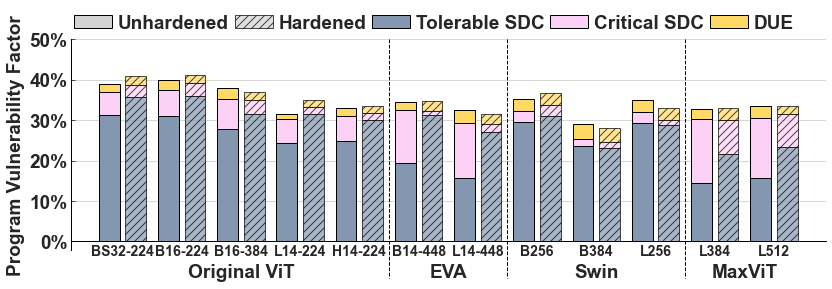

In [10]:
plot_figure("Ampere")

['Original ViT' 'EVA' 'Swin' 'MaxViT']
[ 0 10 20 30 40 50]
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `/home/fernando/git_research/date_2024_vits/fig/pvf_pascal.pdf'.


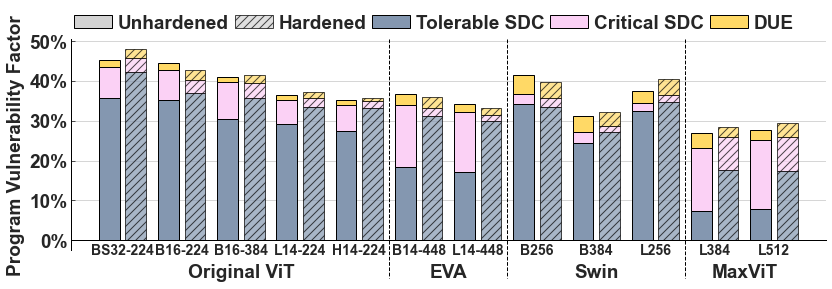

In [11]:
plot_figure("Pascal")

## Paper result section stats

In [12]:
# DUE %
(model_grouped["DUE"].sum() / model_grouped["#faults"].sum()) * 100

2.5154761904761904

In [28]:
# SDC %
calc_average = model_grouped.loc[pd.IndexSlice[:, :, :, "Unhardened"]].droplevel("hardening").groupby(["board", "family"]).sum()

In [29]:
calc_average

SDC  critical_SDC  DUE  #faults  PVF Tolerable SDC  \
board  family                                                              
Ampere Original ViT  2442           551  186     8750           1.395429   
       EVA            616           464   94     3500           0.352000   
       Swin          1445           124  167     5250           0.825714   
       MaxViT         528           540   92     3500           0.301714   
Pascal Original ViT  2768           642  134     8750           1.581714   
       EVA            619           541   83     3500           0.353714   
       Swin          1594           128  206     5250           0.910857   
       MaxViT         264           584  109     3500           0.150857   

                     PVF Critical SDC   PVF DUE  
board  family                                    
Ampere Original ViT          0.314857  0.106286  
       EVA                   0.265143  0.053714  
       Swin                  0.070857  0.095429  
       MaxViT                0.308571  0.052571  
Pascal Original ViT          0.366857  0.076571  
       EVA                   0.309143  0.047429  
       Swin                  0.073143  0.117714  
       MaxViT                0.333714  0.062286

In [36]:
t1 = (calc_average["SDC"] + calc_average["critical_SDC"]) / calc_average["#faults"]

In [37]:
calc_average_pvf = model_grouped.loc[pd.IndexSlice[:, :, :, "Unhardened"]].droplevel("hardening")
calc_average_pvf["PVF SDC"] = calc_average_pvf["PVF Tolerable SDC"] + calc_average_pvf["PVF Critical SDC"] 
t2 = calc_average_pvf.groupby(["board", "family"]).mean()["PVF SDC"]

In [38]:
t1 - t2

board   family      
Ampere  Original ViT    0.000000e+00
        EVA            -5.551115e-17
        Swin            0.000000e+00
        MaxViT          0.000000e+00
Pascal  Original ViT    0.000000e+00
        EVA             0.000000e+00
        Swin            0.000000e+00
        MaxViT          2.775558e-17
dtype: float64

In [39]:
t1

board   family      
Ampere  Original ViT    0.342057
        EVA             0.308571
        Swin            0.298857
        MaxViT          0.305143
Pascal  Original ViT    0.389714
        EVA             0.331429
        Swin            0.328000
        MaxViT          0.242286
dtype: float64

In [13]:
model_grouped[["PVF DUE"]].groupby(["board", "family", "hardening"]).describe()

PVF DUE                                \
                                 count      mean       std       min   
board  family       hardening                                          
Ampere Original ViT Unhardened     5.0  0.021257  0.004470  0.014286   
                    Hardened       5.0  0.019543  0.001586  0.017714   
       EVA          Unhardened     2.0  0.026857  0.009697  0.020000   
                    Hardened       2.0  0.024000  0.001616  0.022857   
       Swin         Unhardened     3.0  0.031810  0.004758  0.028000   
                    Hardened       3.0  0.031048  0.003805  0.028571   
       MaxViT       Unhardened     2.0  0.026286  0.003232  0.024000   
                    Hardened       2.0  0.024286  0.006061  0.020000   
Pascal Original ViT Unhardened     5.0  0.015314  0.002980  0.012571   
                    Hardened       5.0  0.018171  0.007221  0.007429   
       EVA          Unhardened     2.0  0.023714  0.005253  0.020000   
                    Hardened       2.0  0.023143  0.007677  0.017714   
       Swin         Unhardened     3.0  0.039238  0.010227  0.028000   
                    Hardened       3.0  0.037143  0.003024  0.033714   
       MaxViT       Unhardened     2.0  0.031143  0.008485  0.025143   
                    Hardened       2.0  0.029714  0.006465  0.025143   

                                                                        
                                     25%       50%       75%       max  
board  family       hardening                                           
Ampere Original ViT Unhardened  0.020571  0.021143  0.024571  0.025714  
                    Hardened    0.018286  0.020000  0.020000  0.021714  
       EVA          Unhardened  0.023429  0.026857  0.030286  0.033714  
                    Hardened    0.023429  0.024000  0.024571  0.025143  
       Swin         Unhardened  0.029143  0.030286  0.033714  0.037143  
                    Hardened    0.028857  0.029143  0.032286  0.035429  
       MaxViT       Unhardened  0.025143  0.026286  0.027429  0.028571  
                    Hardened    0.022143  0.024286  0.026429  0.028571  
Pascal Original ViT Unhardened  0.012571  0.014857  0.017143  0.019429  
                    Hardened    0.014857  0.020000  0.022857  0.025714  
       EVA          Unhardened  0.021857  0.023714  0.025571  0.027429  
                    Hardened    0.020429  0.023143  0.025857  0.028571  
       Swin         Unhardened  0.034857  0.041714  0.044857  0.048000  
                    Hardened    0.036000  0.038286  0.038857  0.039429  
       MaxViT       Unhardened  0.028143  0.031143  0.034143  0.037143  
                    Hardened    0.027429  0.029714  0.032000  0.034286

In [14]:
crit_hard = model_grouped.loc[pd.IndexSlice[:, :, :, "Hardened"], "critical_SDC"].droplevel("hardening")
crit_unhd = model_grouped.loc[pd.IndexSlice[:, :, :, "Unhardened"], "critical_SDC"].droplevel("hardening")

In [15]:
red = crit_unhd / crit_hard

In [16]:
red.mean()

3.2595558191885208

In [17]:
red

board   family        config  
Ampere  Original ViT  BS32-224     1.903846
                      B16-224      2.000000
                      B16-384      2.180328
                      L14-224      3.258065
                      H14-224      3.655172
        EVA           B14-448     10.761905
                      L14-448      6.432432
        Swin          B256         1.000000
                      B384         1.000000
                      L256         2.086957
        MaxViT        L384         1.859060
                      L512         1.839161
Pascal  Original ViT  BS32-224     2.193548
                      B16-224      2.280702
                      B16-384      2.564516
                      L14-224      2.743590
                      H14-224      3.666667
        EVA           B14-448      8.333333
                      L14-448     10.640000
        Swin          B256         1.073171
                      B384         1.533333
                      L256         1.225806
 

In [45]:
(crit_unhd / 1750) * 100

board   family        config  
Ampere  Original ViT  BS32-224     5.657143
                      B16-224      6.400000
                      B16-384      7.600000
                      L14-224      5.771429
                      H14-224      6.057143
        EVA           B14-448     12.914286
                      L14-448     13.600000
        Swin          B256         2.742857
                      B384         1.600000
                      L256         2.742857
        MaxViT        L384        15.828571
                      L512        15.028571
Pascal  Original ViT  BS32-224     7.771429
                      B16-224      7.428571
                      B16-384      9.085714
                      L14-224      6.114286
                      H14-224      6.285714
        EVA           B14-448     15.714286
                      L14-448     15.200000
        Swin          B256         2.514286
                      B384         2.628571
                      L256         2.171429
 

In [53]:
eva_max = (crit_hard / 1750).groupby(["board", "family"]).mean() * 100

In [54]:
eva_max

board   family      
Ampere  Original ViT    2.617143
        EVA             1.657143
        Swin            1.885714
        MaxViT          8.342857
Pascal  Original ViT    2.857143
        EVA             1.657143
        Swin            1.942857
        MaxViT          8.342857
Name: critical_SDC, dtype: float64

In [55]:
eva_max_un = (crit_unhd / 1750).groupby(["board", "family"]).mean() * 100


In [56]:
eva_max_un

board   family      
Ampere  Original ViT     6.297143
        EVA             13.257143
        Swin             2.361905
        MaxViT          15.428571
Pascal  Original ViT     7.337143
        EVA             15.457143
        Swin             2.438095
        MaxViT          16.685714
Name: critical_SDC, dtype: float64

In [57]:
eva_max_un/eva_max

board   family      
Ampere  Original ViT    2.406114
        EVA             8.000000
        Swin            1.252525
        MaxViT          1.849315
Pascal  Original ViT    2.568000
        EVA             9.327586
        Swin            1.254902
        MaxViT          2.000000
Name: critical_SDC, dtype: float64

In [58]:
eva_max / eva_max_un

board   family      
Ampere  Original ViT    0.415608
        EVA             0.125000
        Swin            0.798387
        MaxViT          0.540741
Pascal  Original ViT    0.389408
        EVA             0.107209
        Swin            0.796875
        MaxViT          0.500000
Name: critical_SDC, dtype: float64